# import

In [150]:
# 데이터 처리 및 수치 계산
import pandas as pd
import numpy as np

# 시각화
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 폰트 및 그래프 설정
plt.rcParams["font.family"] = 'NanumGothic'     
mpl.rcParams["axes.unicode_minus"] = False     

# 경고 제거
import warnings
warnings.filterwarnings('ignore')

# 통계 분석
from scipy import stats
import statsmodels.formula.api as smf
from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 머신러닝 - 전처리, 모델링, 평가
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# 기타 설정
random_state = 42

# Jupyter에서 그래프 바로 출력
%matplotlib inline


In [151]:
df_raw = pd.read_csv('/home/piai/바탕화면/posco-academy-30th/big_data_class/01 실습파일/2. Big Data 분석/Car.csv', encoding='euc-kr')
df_raw.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.6 kmpl,998 CC,58.16 bhp,5.0,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN


In [152]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Price              6200 non-null   float64
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


In [153]:
df_raw_price = df_raw[~df_raw['Price'].isnull()]

In [154]:
df_raw_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6200 entries, 0 to 7236
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6200 non-null   object 
 1   Location           6200 non-null   object 
 2   Price              6200 non-null   float64
 3   Year               6200 non-null   int64  
 4   Kilometers_Driven  6200 non-null   int64  
 5   Fuel_Type          6200 non-null   object 
 6   Transmission       6200 non-null   object 
 7   Owner_Type         6200 non-null   object 
 8   Mileage            6198 non-null   object 
 9   Engine             6164 non-null   object 
 10  Power              6164 non-null   object 
 11  Seats              6158 non-null   float64
 12  New_Price          1005 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 678.1+ KB


간단한 1차원 적인 데이터 전처리

In [155]:
# Name : 자동차 메인 브랜드만 추출
df_raw_price['Brand'] = df_raw_price['Name'].str.split(' ').str[0]

<Axes: xlabel='Price', ylabel='Count'>

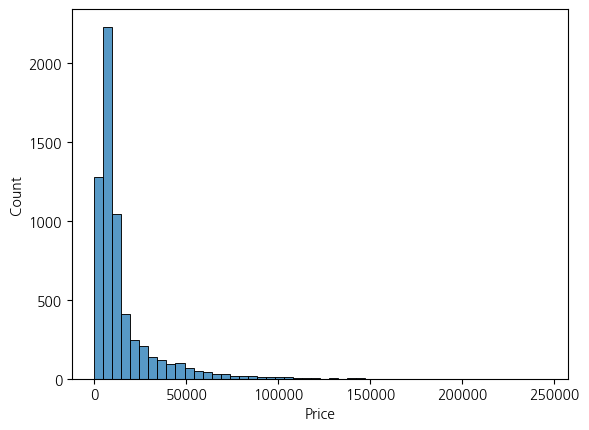

In [156]:
# Price
sns.histplot(df_raw_price['Price'], bins=50)

In [157]:
# Year : 데이터 수집이 2019년(max)이라고 가정하고 몇년됐는지?
df_raw_price['For_year'] = max(df_raw_price['Year']) - df_raw_price['Year']

<Axes: xlabel='Kilometers_Driven', ylabel='Price'>

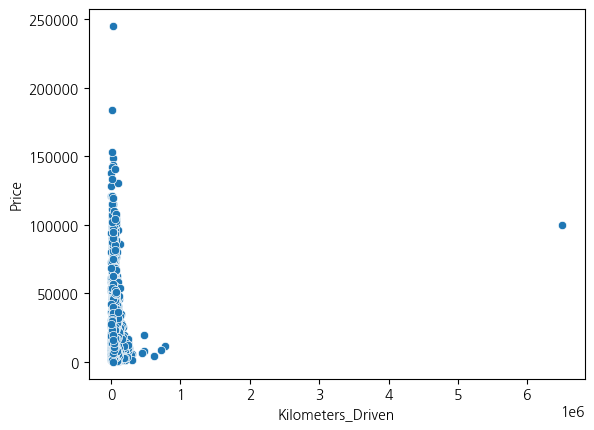

In [158]:
# Kilomerters Driven
sns.scatterplot(x='Kilometers_Driven', y='Price', data=df_raw_price)

In [159]:
df_raw_price[df_raw_price['Kilometers_Driven']<100]

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Brand,For_year


<Axes: xlabel='Fuel_Type', ylabel='Price'>

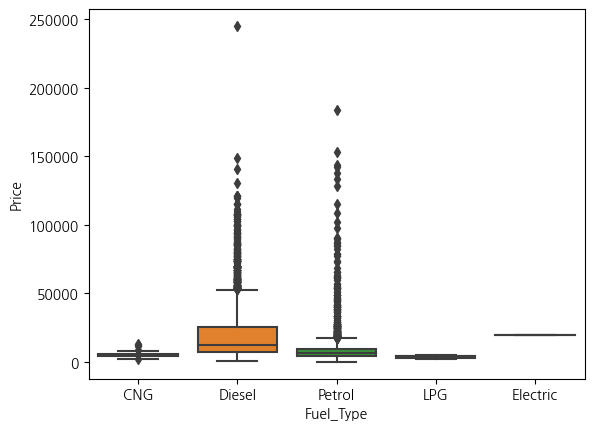

In [160]:
# Fuel_Type : 연료 종류
sns.boxplot(x='Fuel_Type', y='Price', data=df_raw_price)

<Axes: xlabel='Transmission', ylabel='Price'>

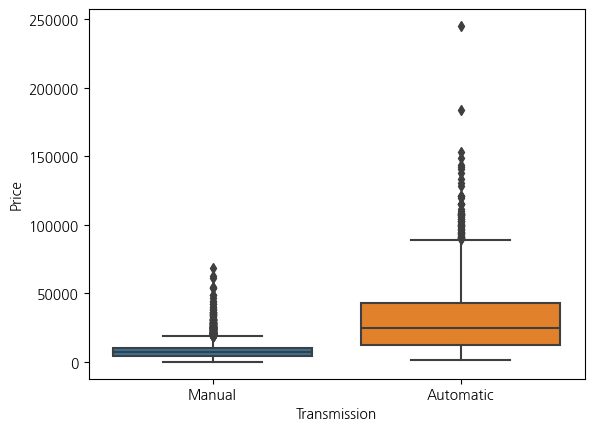

In [161]:
# Transmission : 변속기 종류
sns.boxplot(x='Transmission', y='Price', data=df_raw_price)

<Axes: xlabel='Owner_Type', ylabel='Price'>

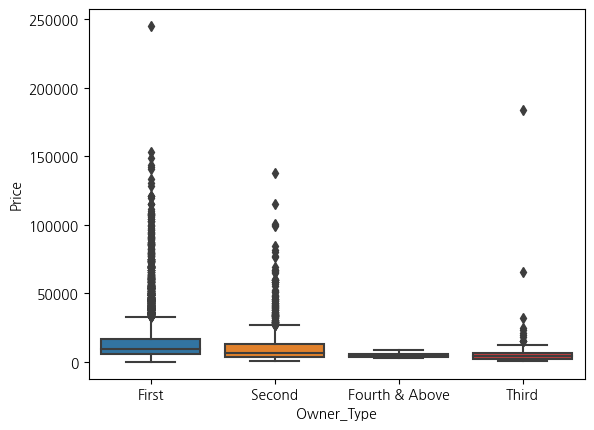

In [162]:
# Owner Type : 소유자 종류
sns.boxplot(x='Owner_Type', y='Price', data=df_raw_price)

In [164]:
# Mileage : 연비 : 문자열로 돼있음 + 연비가 0으로 돼있는게 있다.(68개) -> 이거를 결측치로 봐야할듯함.
df_raw_price['Mileage_num']=df_raw_price['Mileage'].str.split(' ').str[0].astype(float)
print("연비가 0인거의 개수 : ",end=' ')
print(len(df_raw_price[df_raw_price['Mileage_num']==0]))

연비가 0인거의 개수 :  68


In [166]:
# Engine :  문자열로 돼있음 -> 전기차가 배기량이 77임....전기차는 거르는게 맞나요?? 안거를려고 했는데.....일단 기다려보자
df_raw_price['Engine_num']=df_raw_price['Engine'].str.split(' ').str[0].astype(float)


In [171]:
# Power
df_raw_price['Power_num'] = (
    df_raw_price['Power']
    .str.split(' ')
    .str[0]
    .replace('null', np.nan)  # 문자열 'null'을 NaN으로 변환
    .astype(float)
)

In [174]:
df_raw_price[df_raw_price['Engine_num'].isnull()].head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Brand,For_year,Mileage_num,Engine_num,Power_num
194,Honda City 1.5 GXI,Ahmedabad,4522.23,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,NaN,Honda,12,0.0,NaN,NaN
208,Maruti Swift 1.3 VXi,Kolkata,3234.55,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,NaN,Maruti,9,16.1,NaN,NaN
733,Maruti Swift 1.3 VXi,Chennai,2682.68,2006,97800,Petrol,Manual,Third,16.1 kmpl,NaN,NaN,NaN,NaN,Maruti,13,16.1,NaN,NaN
749,Land Rover Range Rover 3.0 D,Mumbai,40623.44,2008,55001,Diesel,Automatic,Second,0.0 kmpl,NaN,NaN,NaN,NaN,Land,11,0.0,NaN,NaN
1294,Honda City 1.3 DX,Delhi,4905.47,2009,55005,Petrol,Manual,First,12.8 kmpl,NaN,NaN,NaN,NaN,Honda,10,12.8,NaN,NaN


In [175]:
df_raw_price[df_raw_price['Power_num'].isnull()].head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Brand,For_year,Mileage_num,Engine_num,Power_num
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,3065.92,2008,111111,Diesel,Manual,First,17.8 kmpl,1399 CC,null bhp,5.0,NaN,Ford,11,17.8,1399.0,NaN
79,Hyundai Santro Xing XL,Hyderabad,1992.85,2005,87591,Petrol,Manual,First,0.0 kmpl,1086 CC,null bhp,5.0,NaN,Hyundai,14,0.0,1086.0,NaN
89,Hyundai Santro Xing XO,Hyderabad,3219.22,2007,73745,Petrol,Manual,First,17.0 kmpl,1086 CC,null bhp,5.0,NaN,Hyundai,12,17.0,1086.0,NaN
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,1303.02,2005,102000,Petrol,Manual,Second,17.0 kmpl,1086 CC,null bhp,5.0,NaN,Hyundai,14,17.0,1086.0,NaN
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2560.04,2008,80759,Petrol,Manual,Third,17.0 kmpl,1086 CC,null bhp,5.0,NaN,Hyundai,11,17.0,1086.0,NaN


일단 이거 Engine이랑 Power 개판(지금은 생각할 힘이 없다)이라서 결측치랑 그런거 다 제거하고 해볼거 같긴합니다~~~

<Axes: xlabel='Seats', ylabel='Price'>

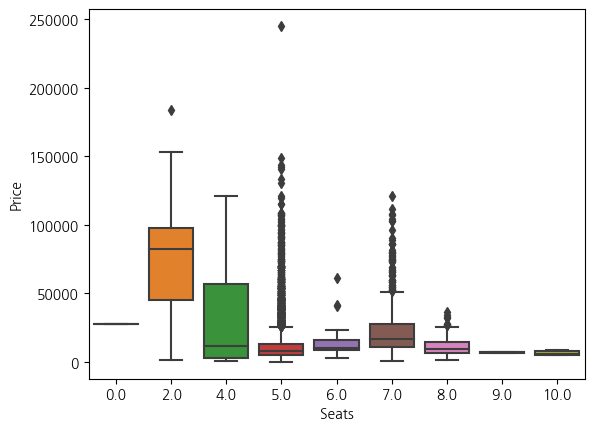

In [193]:
# Seats : 좌석 수 : 결측치 당연히 있고~, 자리가 0개인 차는 뭔 개똥같은 차임?~~~~~
sns.boxplot(x='Seats', y='Price', data=df_raw_price)


<Axes: xlabel='Seats', ylabel='count'>

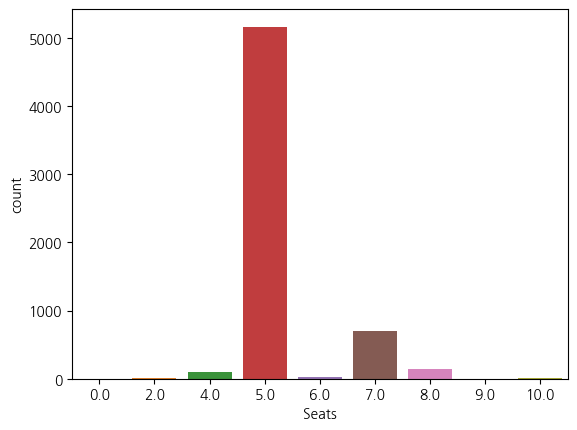

In [194]:
sns.countplot(x='Seats', data=df_raw_price) 

-------

일다 fucking 결측값 무지성으로 다 제거할게요~  
사실 이런 결측치 같은거 예를 들어서 엔진출력량이나 그런거는 같은 브랜드나 비슷한 년도나 뭐 그런거 고려해서 채워 넣을 예정~

In [197]:
# new price 일단 드랍 할게요~
df_raw_price = df_raw_price.drop(columns=['New_Price'])

In [199]:
df_raw_price.dropna(inplace=True)

Mileage, Seats == 0인거 제거하고 -> 이거 drop하면서 다 제거됨. 중복 있는듯?  
전기차 차 종 한번 마이너한거 볼게 -> 전기차도 떨어짐~~ 야호~

일단 지금 알고 있는 이상치만 한번 제거해보자!!  
1. Kilometers_Driven가 혼자 제에에일 높은거

In [214]:
df_raw_price = df_raw_price[df_raw_price['Kilometers_Driven']<6000000]

In [216]:
df_raw_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6052 entries, 0 to 7236
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6052 non-null   object 
 1   Location           6052 non-null   object 
 2   Price              6052 non-null   float64
 3   Year               6052 non-null   int64  
 4   Kilometers_Driven  6052 non-null   int64  
 5   Fuel_Type          6052 non-null   object 
 6   Transmission       6052 non-null   object 
 7   Owner_Type         6052 non-null   object 
 8   Mileage            6052 non-null   object 
 9   Engine             6052 non-null   object 
 10  Power              6052 non-null   object 
 11  Seats              6052 non-null   float64
 12  Brand              6052 non-null   object 
 13  For_year           6052 non-null   int64  
 14  Mileage_num        6052 non-null   float64
 15  Engine_num         6052 non-null   float64
 16  Power_num          6052 

-----

자 이제 내 마음대로 후다다닥 프리스타일 파생변수를 한번 빠르데 만들어보겠습니다.

In [218]:
df_raw_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6052 entries, 0 to 7236
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6052 non-null   object 
 1   Location           6052 non-null   object 
 2   Price              6052 non-null   float64
 3   Year               6052 non-null   int64  
 4   Kilometers_Driven  6052 non-null   int64  
 5   Fuel_Type          6052 non-null   object 
 6   Transmission       6052 non-null   object 
 7   Owner_Type         6052 non-null   object 
 8   Mileage            6052 non-null   object 
 9   Engine             6052 non-null   object 
 10  Power              6052 non-null   object 
 11  Seats              6052 non-null   float64
 12  Brand              6052 non-null   object 
 13  For_year           6052 non-null   int64  
 14  Mileage_num        6052 non-null   float64
 15  Engine_num         6052 non-null   float64
 16  Power_num          6052 

In [219]:
# 1. Engine_num/Power_num
df_raw_price['Engine_Power'] = df_raw_price['Engine_num'] / df_raw_price['Power_num']

In [220]:
# 2. Kilometers_Driven/For_year
df_raw_price['Kilometers_Driven_For_year'] = df_raw_price['Kilometers_Driven'] / df_raw_price['For_year']   

In [221]:
df_raw_price['Owner_Type'].value_counts()

First             5004
Second             940
Third              101
Fourth & Above       7
Name: Owner_Type, dtype: int64

In [222]:
# Owner_Type에서 First는 1, Second는 2, Third는 3, Fourth & Above는 4로 변환
df_raw_price['Owner_Type_num'] = df_raw_price['Owner_Type'].replace({'First': 1, 'Second': 2, 'Third': 3, 'Fourth & Above': 4})

In [223]:
# 3. Kilometers_Driven/Owner_Type_num
df_raw_price['Kilometers_Driven_Owner_Type_num'] = df_raw_price['Kilometers_Driven'] / df_raw_price['Owner_Type_num']   

In [224]:
# 4. For_year/Owner_Type_num
df_raw_price['For_year_Owner_Type_num'] = df_raw_price['For_year'] / df_raw_price['Owner_Type_num'] 

In [225]:
df_raw_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6052 entries, 0 to 7236
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Name                              6052 non-null   object 
 1   Location                          6052 non-null   object 
 2   Price                             6052 non-null   float64
 3   Year                              6052 non-null   int64  
 4   Kilometers_Driven                 6052 non-null   int64  
 5   Fuel_Type                         6052 non-null   object 
 6   Transmission                      6052 non-null   object 
 7   Owner_Type                        6052 non-null   object 
 8   Mileage                           6052 non-null   object 
 9   Engine                            6052 non-null   object 
 10  Power                             6052 non-null   object 
 11  Seats                             6052 non-null   float64
 12  Brand 

In [226]:
df_corr = df_raw_price[['Price','Kilometers_Driven','Seats','For_year',
                        'Mileage_num','Engine_num','Power_num','Engine_Power',
                        'Kilometers_Driven_For_year','Owner_Type_num',
                        'Kilometers_Driven_Owner_Type_num','For_year_Owner_Type_num']]

In [229]:
df_dis = df_raw_price[['Price','Name','Location','Fuel_Type','Transmission','Owner_Type','Brand']]

In [227]:
df_corr.corr()


,Price,Kilometers_Driven,Seats,For_year,Mileage_num,Engine_num,Power_num,Engine_Power,Kilometers_Driven_For_year,Owner_Type_num,Kilometers_Driven_Owner_Type_num,For_year_Owner_Type_num
Price,1.000000,-0.162431,0.056064,-0.296864,-0.333916,0.639245,0.754708,-0.363290,0.103872,-0.094233,-0.118202,-0.260986
Kilometers_Driven,-0.162431,1.000000,0.213002,0.452123,-0.135587,0.161616,0.002778,0.257812,0.465562,0.211043,0.894091,0.363999
Seats,0.056064,0.213002,1.000000,-0.006637,-0.334238,0.400407,0.098995,0.369675,0.184306,0.011345,0.191650,-0.011558
For_year,-0.296864,0.452123,-0.006637,1.000000,-0.287265,0.071727,-0.010935,0.195069,-0.391352,0.387367,0.288536,0.826131
Mileage_num,-0.333916,-0.135587,-0.334238,-0.287265,1.000000,-0.637974,-0.538496,0.036870,0.103067,-0.148670,-0.070836,-0.216176
Engine_num,0.639245,0.161616,0.400407,0.071727,-0.637974,1.000000,0.865445,-0.053863,0.079556,0.059618,0.134959,0.050678
Power_num,0.754708,0.002778,0.098995,-0.010935,-0.538496,0.865445,1.000000,-0.492903,0.010753,0.026686,-0.000556,-0.018876
Engine_Power,-0.363290,0.257812,0.369675,0.195069,0.036870,-0.053863,-0.492903,1.000000,0.072932,0.072126,0.210346,0.159447
Kilometers_Driven_For_year,0.103872,0.465562,0.184306,-0.391352,0.103067,0.079556,0.010753,0.072932,1.000000,-0.106598,0.510763,-0.358470
Owner_Type_num,-0.094233,0.211043,0.011345,0.387367,-0.148670,0.059618,0.026686,0.072126,-0.106598,1.000000,-0.195664,-0.153171


<Axes: >

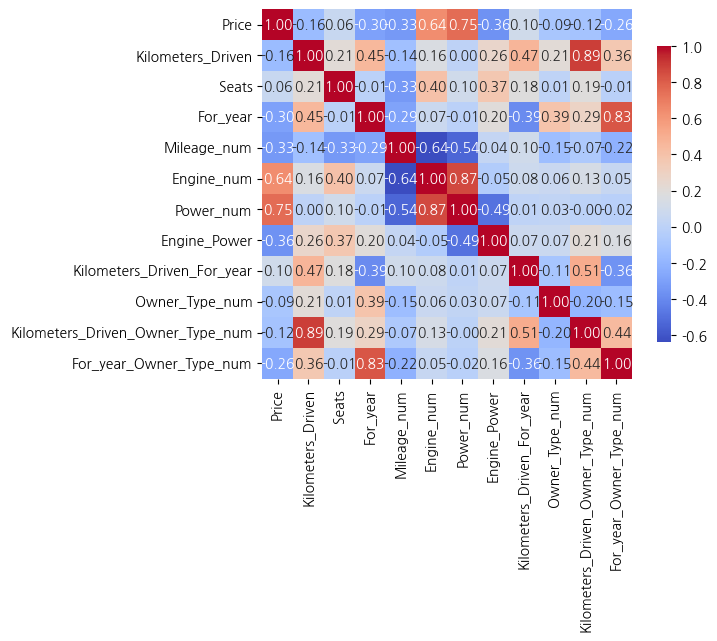

In [228]:
sns.heatmap(df_corr.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

In [230]:
from scipy.stats import f_oneway

def anova_categorical_vs_price(df, target_col, cat_cols):
    for col in cat_cols:
        try:
            groups = [group[target_col].dropna() for _, group in df.groupby(col)]
            if len(groups) > 1:  # 그룹이 2개 이상일 때만 수행
                f_stat, p_val = f_oneway(*groups)
                print(f"{col:<15} | F = {f_stat:.2f}, p = {p_val:.4f}", 
                      "| Significant" if p_val < 0.05 else "")
            else:
                print(f"{col:<15} | 그룹이 하나뿐입니다. (분석 불가)")
        except Exception as e:
            print(f"{col:<15} | 에러 발생: {e}")

# 사용 예시
categorical_cols = ['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand']
anova_categorical_vs_price(df_dis, 'Price', categorical_cols)


Name            | F = 29.95, p = 0.0000 | Significant
Location        | F = 38.19, p = 0.0000 | Significant
Fuel_Type       | F = 224.76, p = 0.0000 | Significant
Transmission    | F = 3083.28, p = 0.0000 | Significant
Owner_Type      | F = 18.07, p = 0.0000 | Significant
Brand           | F = 295.16, p = 0.0000 | Significant


In [231]:
def eta_squared(categories, values):
    import numpy as np
    grand_mean = values.mean()
    groups = [values[categories == cat] for cat in categories.unique()]
    ss_between = sum(len(g) * (g.mean() - grand_mean)**2 for g in groups)
    ss_total = sum((values - grand_mean)**2)
    return ss_between / ss_total

for col in ['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand']:
    eta = eta_squared(df_dis[col], df_dis['Price'])
    print(f"{col:<15} | Eta² = {eta:.4f}")


Name            | Eta² = 0.9298
Location        | Eta² = 0.0595
Fuel_Type       | Eta² = 0.1003
Transmission    | Eta² = 0.3376
Owner_Type      | Eta² = 0.0089
Brand           | Eta² = 0.5784


0.01 미만	무시해도 좋을 정도의 영향 (무관)
0.01 ~ 0.06	작은 효과 (small)
0.06 ~ 0.14	중간 효과 (moderate)
0.14 이상	큰 효과 (large)